<h1 align = "center">北京师范大学2021～2022学年秋季学期期末大作业</h1>
<h1 align = "center">（本科生）</h1>

__课程名称：__<u> 交互式Python编程入门 </u>   &nbsp;&emsp;&emsp;&emsp; __任课教师姓名：__<u> 邓擎琼 </u>

__卷面总分：__<u> 20 </u>   &nbsp;&emsp;&emsp;&emsp; __时长：__<u> 4周 </u> &nbsp;&emsp;&emsp;&emsp; __考试类别：__<u> 其他 </u>

__培养单位：__<u> 统计学院 </u>   &nbsp;&emsp;&emsp;&emsp; __学  科：__<u> 统计学 </u> &nbsp;&emsp;&emsp;&emsp; 统计学__年级：__<u> 2020级 </u>

__姓 名：__<u> 唐露函 </u>   &nbsp;&emsp;&emsp;&emsp; __学 号：__<u> 202011011028 </u>

| 题号    |   第一题      |     第二题  |     第三题  |     第四题  |      第五题 |   总分  |
|:--------|:---------:|:---------:|:---------:|:---------:|---------:|---------:|
| 得分    |             |             |           |            |            |            |


__阅卷教师（签字）：__<u> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;</u>

---

## 题目：

1. 读入“景点数据.xlsx”中的所有数据，该文件保存了去哪儿旅行2021年5月中国每个省/市/自治区的各150个景区的信息；
 <font color='red'>分值：3</font>
&emsp;&emsp;**或者：**利用BeautifulSoup对“景点信息”文件夹中的所有网页进行解析，获得各个景点的信息，包括：景点名字、所在省份、级别、热门程度、景点描述、位置、价格以及月售票量，并把所有数据保存在电脑里，保存的数据和样式可依据文件——景点数据.xlsx ；  <font color='red'>分值：7</font>
2. 得到所有的景点描述文字，对该文字进行分词以及词性分析，然后分别对其中两个字及以上的名词和形容词词语生成词云，并要求读入一张图像作为mask，同时词云中不考虑以下词语： ‘公园’ 、 ‘景区’ 和'度假区'；   <font color='red'>分值：5</font>
3. 分别统计各省/市/自治区的5A景区、4A景区和3A景区的数量，对5A景区/4A景区/3A景区，分别绘制一张饼图显示各省/市/自治区该级别景区数量的比例，其中只对数量排在前15的各省/市/自治区进行单独处理，剩下各省/市/自治区统一处理；      
**或者：**分别统计各省/市/自治区的5A景区、4A景区和3A景区的数量，对5A景区/4A景区/3A景区，分别绘制一张地图显示各省/市/自治区该级别景区的数量，并根据数据进行颜色映射; <font color='red'>分值：5</font>
4. 根据景点的月售票量进行排序，并采用柱状图显示前20名的景点及其月售票量，设置纵坐标轴标签、图的标题；<font color='red'>分值：3</font>

## 承诺：本人承诺本程序是自己编写的，没有抄袭。
这里写上你的不抄袭承诺！

第1题：利用BeautifulSoup对“景点信息”文件夹中的所有网页进行解析，获得各个景点的信息，包括：景点名字、所在省份、级别、热门程度、景点描述、位置、价格以及月售票量，并把所有数据保存在电脑里，保存的数据和样式可依据文件——景点数据.xlsx ； 分值：7

In [15]:
#导入
from bs4 import BeautifulSoup
import os
from openpyxl import Workbook
import pandas as pd
import xlwt
#爬取数据
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36 Edg/96.0.1054.53'}
curdir=r'D:\Python作业\大作业\大作业\景点信息'
curdirr = os.listdir(curdir)
#print(curdirr)
#创建Excel表格
shengfen=[]
jingdian=[]
xiaoliang=[]
work_book=xlwt.Workbook(encoding='utf-8')
for j in range(0,34):#34个省份
    x = os.path.join(curdir,curdirr[10*j])#每个省份有10个文件
    #print(x)
    sf = x.split('_')[0].split('\\')[5]#0:保留上一个分割的元素再进行分割
    #print(sf)
    shengfen.append(sf)
    sheet=work_book.add_sheet(sf)#创建省份的sheet
    sheet.write(0,0,'name')
    sheet.write(0,1,'level')
    sheet.write(0,2,'hot')
    sheet.write(0,3,'text')
    sheet.write(0,4,'location')
    sheet.write(0,5,'price')
    sheet.write(0,6,'sale')
    x1=x2=x3=x4=x5=x6=x7=1
    
    #遍历文件夹curdirr下的所有文件，不包括子文件夹中的文件
    for f in curdirr[10*j:10*j+10]:
        filename = os.path.join(curdir,f)
        #print(filename)
        soup=BeautifulSoup(open(filename,encoding='utf-8'),'lxml')                      
        name = soup.find_all('a',{'class':'name'})#名称
        #level = soup.find_all('span',{'class':'level'})#等级
        hot=soup.find_all('span',{'class':'product_star_level'})#热度
        text=soup.find_all('div',{'class':'intro color999'})#简介
        location=soup.find_all('p',{'class':'address color999'})#位置
        price=soup.find_all('span',{'class':'sight_item_price'})#价格
        sale=soup.find_all('span',{'class':'hot_num'})#销量
    
        #-----------------------------------------------------------------
        for i in name:
            #print(i['title'])
            names=i['title']
            sheet.write(x1,0,names)
            x1+=1
            jingdian.append(names)
        L = soup.find_all('div',class_='sight_item_detail clrfix')
        for i in L:
            level = i.find('span',{'class':'level'})
            if level==None:
                level=' '
            else:
                level=i.find('span',{'class':'level'}).text.strip()
            #print(level)
            levels=level
            sheet.write(x2,1,levels)
            x2+=1
        for i in hot:
            j=i.text
            j=j[3:]
            #print(j)
            hots=j
            sheet.write(x3,2,hots)
            x3+=1
        for i in text:
            #print(i['title'])
            texts=i['title']
            sheet.write(x4,3,texts)
            x4+=1
            
        for i in location:
            j=i.text
            j=j[3:]
            #print(j)
            locations=j
            sheet.write(x5,4,locations)
            x5+=1
        for i in price:
            j=i.text
            j=j[1:-2]
            #print(j)
            prices=j
            sheet.write(x6,5,prices)
            x6+=1
        for i in sale:
            j=i.text
            #print(j)
            sales=int(j)
            sheet.write(x7,6,sales)
            x7+=1
            xiaoliang.append(sales)

work_book.save('Excel景点数据.xls')

得到所有的景点描述文字，对该文字进行分词以及词性分析，然后分别对其中两个字及以上的名词和形容词词语生成词云，并要求读入一张图像作为mask，同时词云中不考虑以下词语： ‘公园’ 、 ‘景区’ 和'度假区'，得到类似如下的结果；  分值：5


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\tlh\AppData\Local\Temp\jieba.cache
Loading model cost 0.671 seconds.
Prefix dict has been built successfully.


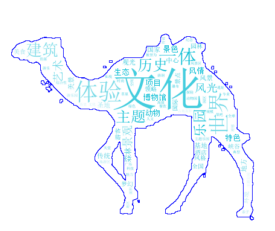

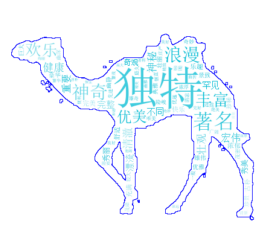

In [2]:
#导入
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import jieba
import numpy as np
from wordcloud import STOPWORDS
import jieba.posseg as jp
Text = list()

for i in shengfen:
    a=pd.read_excel('Excel景点数据.xls',sheet_name=i)
    b=a.text
    for j in b:
        j= str(j)
        Text.append(j)
#写入TXT文件
f=open("文字描述.txt","w",encoding='utf-8')
f.writelines(Text)
f.close()
#读入TXT文件
with open(r'C:\Users\tlh\大作业\大作业\文字描述.txt', encoding='utf-8') as f:
    report = f.read()

#词性分析
ci1=[]
ci2=[]

words =jp.cut(report)
lst1 = [x.word for x in words if x.flag == 'n']
words =jp.cut(report)
lst2 = [x.word for x in words if x.flag == 'a']

for i in lst1:
    if len(i)>=2:
        ci1.append(i)
for i in lst2:
    if len(i)>=2:
        ci2.append(i)

#写入TXT文件
f=open("分词n.txt","w",encoding='utf-8')
f.writelines(ci1)
f.close()
f=open("分词a.txt","w",encoding='utf-8')
f.writelines(ci2)
f.close()
#读入TXT文件
with open(r'C:\Users\tlh\大作业\大作业\分词n.txt', encoding='utf-8') as f:
    fen1 = f.read()
fencin=' '.join(jieba.cut(fen1))
with open(r'C:\Users\tlh\大作业\大作业\分词a.txt', encoding='utf-8') as f:
    fen2 = f.read()
fencia=' '.join(jieba.cut(fen2))
# read the mask
t_coloring = np.array(Image.open(r'C:\Users\tlh\大作业\大作业\背景图.png'))
stopwords = set(STOPWORDS)
stopwords.add('公园')
stopwords.add('景区')
stopwords.add('度假区')

# create coloring from image
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(t_coloring)

# Generate a word cloud image
wcn = WordCloud(background_color="white", max_words=80, 
               mask=t_coloring,stopwords=stopwords, 
               color_func=image_colors,max_font_size=200,
               font_path='C\Windows\Fonts\simsun.ttc',
              min_word_length=2,contour_width=1, contour_color='blue').generate(fencin)
wca = WordCloud(background_color="white", max_words=80, 
               mask=t_coloring,stopwords=stopwords, 
               color_func=image_colors,max_font_size=200,
               font_path='C\Windows\Fonts\simsun.ttc',
              min_word_length=2,contour_width=1, contour_color='blue').generate(fencia)
# show
import matplotlib.pyplot as plt
plt.imshow(wcn, interpolation="bilinear")
plt.axis("off")
plt.savefig('名词词云.jpg',dpi=500)
plt.show()
plt.imshow(wca, interpolation="bilinear")
plt.axis("off")
plt.savefig('形容词词云.jpg',dpi=500)

分别统计各省/市/自治区的5A景区、4A景区和3A景区的数量，对5A景区/4A景区/3A景区，分别绘制一张饼图显示各省/市/自治区该级别景区数量的比例，其中只对数量排在前15的各省/市/自治区进行单独处理，剩下各省/市/自治区统一处理，得到类似如下的结果；   分值：5


或者：分别统计各省/市/自治区的5A景区、4A景区和3A景区的数量，对5A景区/4A景区/3A景区，分别绘制一张地图显示各省/市/自治区该级别景区的数量，并根据数据进行颜色映射，得到类似如下的结果；   分值：5


In [97]:
from pyecharts.charts import *
from pyecharts import options as opts
province = shengfen

jingqu={}
c1=()
c2=()
c3=()
data1=[]
data2=[]
data3=[]
d1=[]
d2=[]
d3=[]
for i in shengfen:
    a=pd.read_excel('Excel景点数据.xls',sheet_name=i)
    b=a.level
    a1=a2=a3=0
    for j in b:
        if j =='5A景区':
            a1+=1
        if j =='4A景区':
            a2+=1
        if j =='3A景区':
            a3+=1
    jingqu={'省份':i,'5A景区':a1,'4A景区':a2,'3A景区':a3}
    c1=(jingqu['省份'],jingqu['5A景区'])
    data1.append(c1)
    c2=(jingqu['省份'],jingqu['4A景区'])
    data2.append(c2)
    c3=(jingqu['省份'],jingqu['3A景区'])
    data3.append(c3)
    d1.append(a1),d2.append(a2),d3.append(a3)
#----------------------------------------------------
map_ = (
    Map()
    .add('5A景区', data1, 'china')
    .set_global_opts(
            # VisualMapOpts：视觉映射配置项
        visualmap_opts=opts.VisualMapOpts(
            is_show = True,
            type_ = "color",
            min_ =min(d1),
            max_ =max(d1),
            range_color = ['#015482','#7bc8f6','#ca9bf7','#4b006e'],
            range_size = None,
            range_opacity = None,
            orient = 'horizontal',
            pos_left = 'center',
            pos_right = None,
            pos_top = None,
            pos_bottom = None,
        )
    )
)
map_.render_notebook()
map_.render('5A景区.html')
#----------------------------------------------------------------------
map1_ = (
    Map()
    .add('4A景区', data2, 'china')
    .set_global_opts(
            # VisualMapOpts：视觉映射配置项
        visualmap_opts=opts.VisualMapOpts(
            is_show = True,
            type_ = "color",
            min_ =min(d2),
            max_ =max(d2),
            range_color = ['#015482','#7bc8f6','#ca9bf7','#4b006e'],
            range_size = None,
            range_opacity = None,
            orient = 'horizontal',
            pos_left = 'center',
            pos_right = None,
            pos_top = None,
            pos_bottom = None,
        )
    )
)
map1_.render_notebook()
map1_.render('4A景区.html')
#----------------------------------------------------------------------
map2_ = (
    Map()
    .add('3A景区', data3, 'china')
    .set_global_opts(
            # VisualMapOpts：视觉映射配置项
        visualmap_opts=opts.VisualMapOpts(
            is_show = True,
            type_ = "color",
            min_ =min(d3),
            max_ =max(d3),
            range_color = ['#015482','#7bc8f6','#ca9bf7','#4b006e'],
            range_size = None,
            range_opacity = None,
            orient = 'horizontal',
            pos_left = 'center',
            pos_right = None,
            pos_top = None,
            pos_bottom = None,
        )
    )
)
map2_.render_notebook()
map2_.render('3A景区.html')

'C:\\Users\\tlh\\大作业\\大作业\\3A景区.html'

根据景点的月售票量进行排序，并采用柱状图显示前20名的景点及其月售票量，设置纵坐标轴标签、图的标题，得到类似如下的结果；   分值：3


In [50]:
#print(jingdian)
#print(xiaoliang)
work_book=xlwt.Workbook(encoding='utf-8')
sht1 = work_book.add_sheet('sheet1')
sht1.write(0,0,'name')
sht1.write(0,1,'sale')
f1=f2=1
for i in xiaoliang:
    sht1.write(f1,1,i)
    f1+=1
for i in jingdian:
    sht1.write(f2,0,i)
    f2+=1
work_book.save('景点名称和月销量数据.xls')
import pandas as pd
df = pd.read_excel('景点名称和月销量数据.xls')
df.sort_values(by='sale',inplace=True,ascending=False)
df1=df.head(20)
df2=df1.values
jd=[]
xl=[]
for i in df2:
    jd.append(i[0])
    xl.append(i[1])

import matplotlib.pyplot as plt

# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#单独弹出窗口
%matplotlib qt5
mc = jd
yxl = xl
plt.bar(mc, yxl)
plt.title('月销量前20的景点')
plt.ylabel('售票数量（张）',size=15)
plt.xticks(rotation=90)#刻度值与坐标轴旋转90度
plt.savefig('销量图.jpg',dpi=100,bbox_inches = 'tight')
plt.show()